Based on Water Quality Data from Hope.
From Environment Canada via Rich Pawlowicz and Olivier Riche

In [136]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
%matplotlib inline

In [137]:
mat = scipy.io.loadmat('fraser_waterquality.mat')

In [162]:
mtime = mat['fraserqual'][0][0][1]
ptime = []
for i in range(mtime.shape[0]):
    ptime.append(datetime.fromordinal(int(mtime[i][0])) + timedelta(days=mtime[i][0]%1) - timedelta(days = 366))
dissolved_NO2 = mat['fraserqual'][0][0][2]
dissolved_NO23 = mat['fraserqual'][0][0][3][:,0]
dissolved_Si = mat['fraserqual'][0][0][13][:,0]
print (dissolved_NO23.shape)

(578,)


(0, 2)

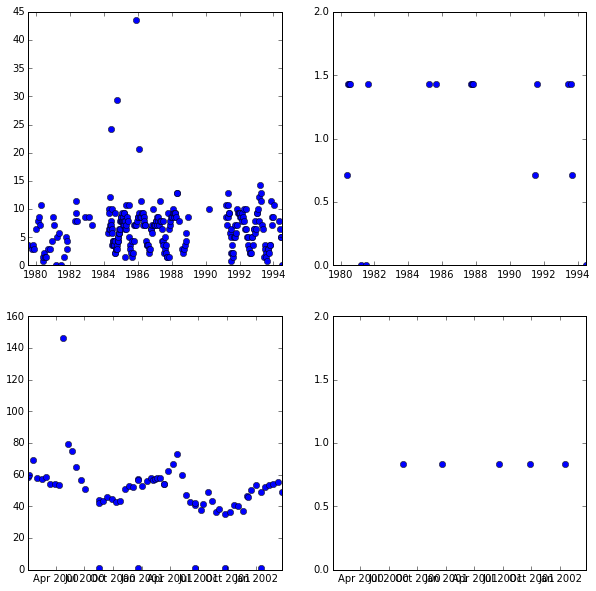

In [163]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(ptime, dissolved_NO23, 'o')
ax[0,1].plot(ptime, dissolved_NO23, 'o')
ax[0,1].set_ylim((0, 2))
ax[1,0].plot(ptime, dissolved_Si, 'o')
ax[1,1].plot(ptime, dissolved_Si, 'o')
ax[1,1].set_ylim((0, 2))

Put data in a pandas dataframe but NO23: remove the four high outliers and five low outliers.   
Si: remove the single high and five low outliers.


dissolved_NO23                          
              mean count       std       sem
mon                                         
1         8.650794    18  0.879570  0.207317
2         8.492063    18  0.844760  0.199112
3         8.720238    24  2.527394  0.515902
4         8.983516    26  2.269344  0.445055
5         8.084416    22  1.655253  0.352901
6         5.228571    25  2.384402  0.476880
7         3.195489    19  0.992272  0.227643
8         2.888199    23  1.688637  0.352105
9         3.464286    20  1.576462  0.352508
10        4.685714    25  1.822012  0.364402
11        6.938776    21  2.047184  0.446732
12        7.689076    17  1.275990  0.309473

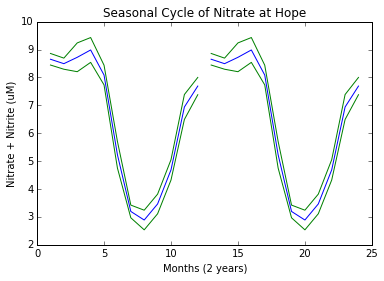

In [154]:
df = pd.DataFrame({'dissolved_NO23': dissolved_NO23}, index=ptime)
df = df[df.dissolved_NO23 < 15]
df = df[df.dissolved_NO23 > 1]
grouper = pd.TimeGrouper("1M")
df['mon'] = df.index.month
monmean = df.groupby('mon').agg(['mean','count', 'std', 'sem'])
monthsy1 = range(1,13)
monthsy2 = range(13,25)

plt.plot(monthsy1, monmean['dissolved_NO23']['mean'], 'b')
plt.plot(monthsy2, monmean['dissolved_NO23']['mean'], 'b')
plt.plot(monthsy1, monmean['dissolved_NO23']['mean'] + monmean['dissolved_NO23']['sem'], 'g')
plt.plot(monthsy2, monmean['dissolved_NO23']['mean'] + monmean['dissolved_NO23']['sem'], 'g')
plt.plot(monthsy1, monmean['dissolved_NO23']['mean'] - monmean['dissolved_NO23']['sem'], 'g')
plt.plot(monthsy2, monmean['dissolved_NO23']['mean'] - monmean['dissolved_NO23']['sem'], 'g')

plt.xlabel('Months (2 years)')
plt.ylabel('Nitrate + Nitrite (uM)')
plt.title('Seasonal Cycle of Nitrate at Hope')

monmean

dissolved_Si                           
            mean count        std       sem
mon                                        
1      56.685185     9   5.779781  1.926594
2      56.777778     9   1.724013  0.574671
3      54.857143     7   4.017817  1.518592
4      64.500000     3  10.038814  5.795912
5      65.291667     4  14.726126  7.363063
6      49.300000     5  10.716939  4.792761
7      44.791667     4   6.286928  3.143464
8      41.833333     5   3.039097  1.359126
9      40.958333     4   4.909128  2.454564
10     40.791667     4   3.235724  1.617862
11     45.375000     4   7.816619  3.908310
12     51.472222     6   4.665972  1.904875

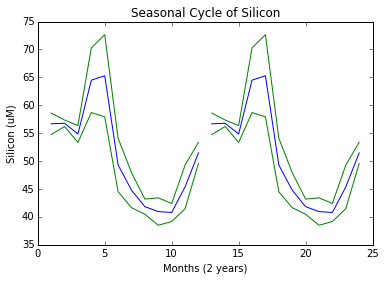

In [159]:
df = pd.DataFrame({'dissolved_Si': dissolved_Si}, index=ptime)
df = df[df.dissolved_Si < 100]
df = df[df.dissolved_Si > 1]
grouper = pd.TimeGrouper("1M")
df['mon'] = df.index.month
monmean = df.groupby('mon').agg(['mean','count', 'std', 'sem'])
monthsy1 = range(1,13)
monthsy2 = range(13,25)

plt.plot(monthsy1, monmean['dissolved_Si']['mean'], 'b')
plt.plot(monthsy2, monmean['dissolved_Si']['mean'], 'b')
plt.plot(monthsy1, monmean['dissolved_Si']['mean'] + monmean['dissolved_Si']['sem'], 'g')
plt.plot(monthsy2, monmean['dissolved_Si']['mean'] + monmean['dissolved_Si']['sem'], 'g')
plt.plot(monthsy1, monmean['dissolved_Si']['mean'] - monmean['dissolved_Si']['sem'], 'g')
plt.plot(monthsy2, monmean['dissolved_Si']['mean'] - monmean['dissolved_Si']['sem'], 'g')

plt.xlabel('Months (2 years)')
plt.ylabel('Silicon (uM)')
plt.title('Seasonal Cycle of Silicon')

monmean